In [47]:
import schwab
import chucks
import pandas as pd
import seaborn as sns
import yfinance as yf

%matplotlib inline
sns.set_theme()

In [2]:
c = chucks.utils.get_schwab_client()
chucks.ChucksAccessor.set_client(c)

In [97]:
fund = 'SPY'
ticker = yf.Ticker(fund)

In [98]:
th = ticker.funds_data.top_holdings
th

,Name,Holding Percent
Symbol,,
AAPL,Apple Inc,0.071161
NVDA,NVIDIA Corp,0.067663
MSFT,Microsoft Corp,0.062576
AMZN,Amazon.com Inc,0.036076
META,Meta Platforms Inc Class A,0.025691
GOOGL,Alphabet Inc Class A,0.020771
GOOG,Alphabet Inc Class C,0.017184
BRK-B,Berkshire Hathaway Inc Class B,0.017113
AVGO,Broadcom Inc,0.016373


In [114]:
symbol = th.iloc[-3].name
symbol = th.iloc[0].name
symbol

'AAPL'

In [115]:
pd.DataFrame.chucks.read_instruments(c.get_instruments(symbol, c.Instrument.Projection.FUNDAMENTAL)).T

symbol,AAPL
cusip,037833100
symbol,AAPL
description,APPLE INC
exchange,NASDAQ
assetType,EQUITY
...,...
fundamental_eps,6.08
fundamental_dtnVolume,33498439
fundamental_nextDividendPayDate,2025-02-14 00:00:00.0
fundamental_nextDividendDate,2025-02-10 00:00:00.0


In [116]:
df = pd.DataFrame.chucks.read_candles(
        [c.get_price_history_every_day(symbol)]
).drop(columns='volume')
df

,open,high,low,close,symbol,empty
datetime,,,,,,
1985-01-02 06:00:00,0.130023,0.130023,0.124442,0.124442,AAPL,False
1985-01-03 06:00:00,0.126674,0.130023,0.126674,0.126674,AAPL,False
1985-01-04 06:00:00,0.126674,0.127232,0.125000,0.126674,AAPL,False
1985-01-07 06:00:00,0.126674,0.127232,0.126116,0.126116,AAPL,False
1985-01-08 06:00:00,0.126116,0.127232,0.125000,0.125000,AAPL,False
...,...,...,...,...,...,...
2024-11-22 06:00:00,228.060000,230.719900,228.060000,229.870000,AAPL,False
2024-11-25 06:00:00,231.460000,233.245000,229.740000,232.870000,AAPL,False
2024-11-26 06:00:00,233.330000,235.570000,233.330000,235.060000,AAPL,False


In [153]:
from scipy.stats import boxcox

<Axes: xlabel='datetime'>

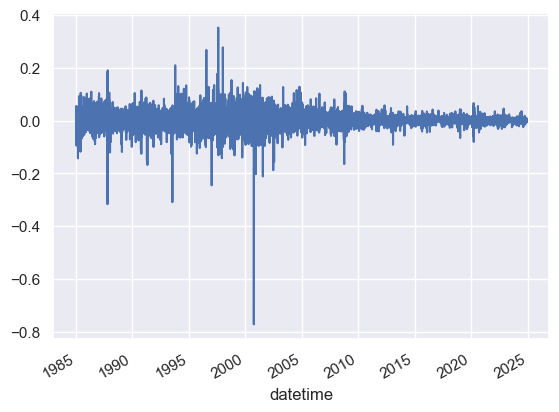

In [165]:
df.assign(
    close_bc=lambda df: boxcox(df.close)[0],
    close_bc_lambda=lambda df: boxcox(df.close)[1],
).close_bc.diff().plot()

<Axes: xlabel='datetime'>

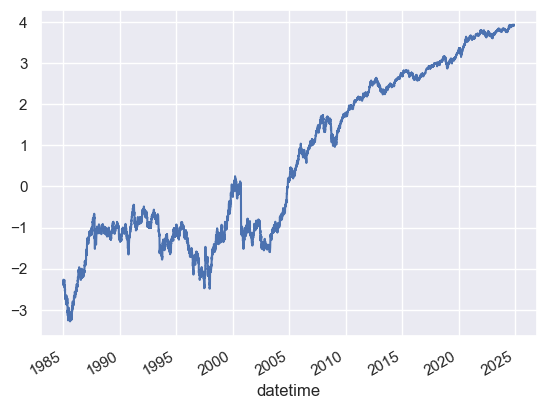

In [172]:
df.assign(
    close_bc=lambda df: boxcox(df.close)[0],
    close_bc_lambda=lambda df: boxcox(df.close)[1],
).close_bc.plot()

In [ ]:
t = yf.Ticker(symbol)

In [201]:
t.cashflow.pct_change(-1, axis=1)
t.cashflow.diff(-1, axis=1)
t.cashflow

/var/folders/kf/3kmh_tf15bq5_jj4t0v7wj480000gn/T/ipykernel_34847/1791725825.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  t.cashflow.pct_change(-1, axis=1)
/var/folders/kf/3kmh_tf15bq5_jj4t0v7wj480000gn/T/ipykernel_34847/1791725825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t.cashflow.pct_change(-1, axis=1)


,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,108807000000.0,99584000000.0,111443000000.0,92953000000.0,NaN
Repurchase Of Capital Stock,-94949000000.0,-77550000000.0,-89402000000.0,-85971000000.0,NaN
Repayment Of Debt,-9958000000.0,-11151000000.0,-9543000000.0,-8750000000.0,NaN
Issuance Of Debt,0.0,5228000000.0,5465000000.0,20393000000.0,NaN
Issuance Of Capital Stock,NaN,NaN,NaN,1105000000.0,880000000.0
Capital Expenditure,-9447000000.0,-10959000000.0,-10708000000.0,-11085000000.0,NaN
Interest Paid Supplemental Data,NaN,3803000000.0,2865000000.0,2687000000.0,3002000000.0
Income Tax Paid Supplemental Data,26102000000.0,18679000000.0,19573000000.0,25385000000.0,NaN
End Cash Position,29943000000.0,30737000000.0,24977000000.0,35929000000.0,NaN
Beginning Cash Position,30737000000.0,24977000000.0,35929000000.0,39789000000.0,NaN


In [185]:
df.diff?

Signature: df.diff(periods: 'int' = 1, axis: 'Axis' = 0) -> 'DataFrame'
Docstring:
First discrete difference of element.

Calculates the difference of a DataFrame element compared with another
element in the DataFrame (default is element in previous row).

Parameters
----------
periods : int, default 1
    Periods to shift for calculating difference, accepts negative
    values.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Take difference over rows (0) or columns (1).

Returns
-------
DataFrame
    First differences of the Series.

See Also
--------
DataFrame.pct_change: Percent change over given number of periods.
DataFrame.shift: Shift index by desired number of periods with an
    optional time freq.
Series.diff: First discrete difference of object.

Notes
-----
For boolean dtypes, this uses :meth:`operator.xor` rather than
:meth:`operator.sub`.
The result is calculated according to current dtype in DataFrame,
however dtype of the result is always float64.

Examples
--------